In [1]:
from duckduckgo_search import ddg_images
from fastcore.foundation import *
from fastai.vision.utils import *
from fastai.vision.all import *
from fastdownload import download_url
from pathlib import Path

In [3]:
def get_urls(query, max_results=50):
    raw_urls = ddg_images(query, max_results=max_results)
    return L(raw_urls).itemgot('image')

In [4]:
get_urls('valorant', 1)

(#1) ['https://cdn.oneesports.gg/cdn-data/2021/05/Valorant_RetakeEpisode2CinematicViperScreenshot.jpg']

In [5]:
download_url(get_urls('valorant', 1)[0], 'val.jpg')

Path('val.jpg')

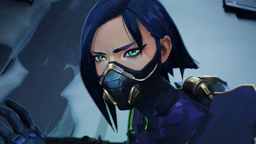

In [6]:
img = Image.open('val.jpg')
img.to_thumb(256)

In [8]:
download_images('valorant/', urls=get_urls('valorant'))

In [9]:
download_images('overwatch/', urls=get_urls('overwatch'))

In [21]:
classes = ['overwatch', 'valorant']
ow_images = [Path(f"overwatch/{f}") for f in os.listdir('overwatch')]
val_images = [Path(f"valorant/{f}") for f in os.listdir('valorant')]
images = ow_images + val_images

In [22]:
failed = verify_images(images)
failed.map(Path.unlink)

(#12) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
for c in classes:
    d = f"images/{c}"
    resize_images(d, max_size=400, dest=d)

In [2]:
device = torch.device("cpu")
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(192, method='squish')]
).dataloaders(Path('images'),  bs=32)

/home/dpelis/miniconda3/envs/deep/lib/python3.7/site-packages/torch/cuda/__init__.py:132: UserWarning: 
    Found GPU0 GeForce GTX 760 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


In [3]:
dir(db)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tfms',
 '_after_item',
 '_call',
 '_component_attr_filter',
 '_component_attr_filter',
 '_component_attr_filter',
 '_dbunch_type',
 '_dbunch_type',
 '_decode_batch',
 '_default',
 '_default',
 '_default',
 '_device',
 '_dir',
 '_dir',
 '_dir',
 '_dl_type',
 '_dl_type',
 '_do_call',
 '_docs',
 '_docs',
 '_get',
 '_is_showable',
 '_methods',
 '_n_inp',
 '_name',
 '_new',
 '_new',
 '_noop_methods',
 '_one_pass',
 '_pre_show_batch',
 '_repr_pretty_',
 '_retain_dl',
 '_set',
 '_types',
 'add',
 'add_na',
 'add_tfms',
 'after_batch',
 'after_item',
 'after_iter'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


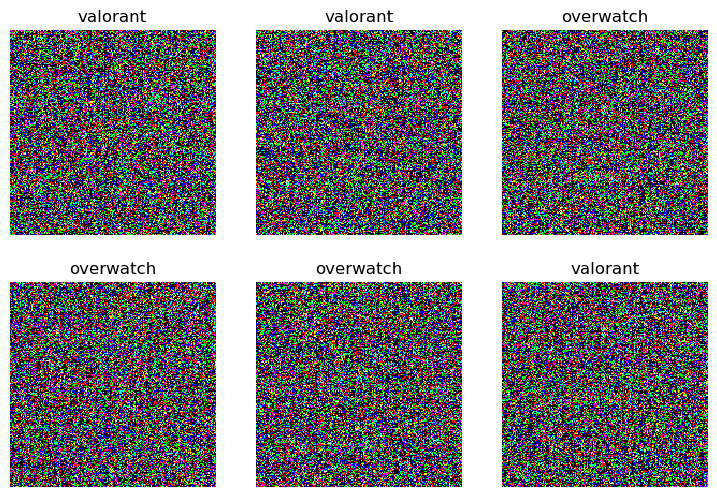

In [4]:
db.show_batch(max_n=6)